Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

**Importing Data**

In [2]:
df = pd.read_csv("updated.csv")

In [3]:

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.155350e+05,2.152820e+05,2.140860e+05,1.963590e+05,196294.000000,195114.000000,214550.000000,214297.000000,213106.000000,195387.000000,...,137532.000000,90674.000000,163935.000000,209988.000000,179677.000000,2.251280e+05,7.686000e+03,7686.000000,7736.00000,7686.000000
mean,4.395599e+06,1.239679e+04,1.243424e+04,7.370037e+04,139.006592,139.714577,59520.250283,189.397915,189.886321,687.470639,...,32.809754,50.928633,3.089044,73.618607,0.724803,1.412899e+08,4.785388e+04,9.876106,14.34651,1333.351425
std,2.749230e+07,8.546069e+04,8.352213e+04,3.791589e+05,731.943591,717.539953,105676.130032,1052.103363,668.213209,973.192399,...,13.534741,31.882061,2.552346,7.446180,0.149610,6.911706e+08,1.325075e+05,13.511560,26.39345,1716.352492
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.92000,-1884.678982
25%,4.277000e+03,0.000000e+00,6.143000e+00,1.130000e+02,0.000000,0.000000,1072.408500,0.000000,1.348000,29.353000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.216260e+05,3.152500e+01,0.510000,-0.10250,25.171627
50%,4.851100e+04,5.500000e+01,9.500000e+01,1.166000e+03,1.000000,1.571000,10187.910000,7.612000,19.411000,211.209000,...,31.400000,49.839000,2.500000,75.050000,0.742000,7.425058e+06,5.874900e+03,7.390000,7.33000,793.369452
75%,5.169760e+05,9.620000e+02,1.130250e+03,9.716000e+03,14.000000,15.857000,71838.528500,97.492000,135.882500,1017.542500,...,41.300000,83.241000,4.200000,79.070000,0.845000,3.298164e+07,3.451410e+04,15.530000,19.81000,2079.898586
max,6.257036e+08,4.081747e+06,3.436276e+06,6.570688e+06,17737.000000,14858.286000,662430.093000,195005.313000,36401.607000,6432.566000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.909295e+09,1.224011e+06,76.550000,376.51000,9766.306877


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226113 entries, 0 to 226112
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    226113 non-null  object 
 1   continent                                   213206 non-null  object 
 2   location                                    226113 non-null  object 
 3   date                                        226113 non-null  object 
 4   total_cases                                 215535 non-null  float64
 5   new_cases                                   215282 non-null  float64
 6   new_cases_smoothed                          214086 non-null  float64
 7   total_deaths                                196359 non-null  float64
 8   new_deaths                                  196294 non-null  float64
 9   new_deaths_smoothed                         195114 non-null  float64
 

In [6]:
df.shape

(226113, 67)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


In [8]:

df.count()

iso_code                                   226113
continent                                  213206
location                                   226113
date                                       226113
total_cases                                215535
                                            ...  
population                                 225128
excess_mortality_cumulative_absolute         7686
excess_mortality_cumulative                  7686
excess_mortality                             7736
excess_mortality_cumulative_per_million      7686
Length: 67, dtype: int64

**Checking the Missing or Null values**


In [9]:
print(df.isnull().sum())

iso_code                                        0
continent                                   12907
location                                        0
date                                            0
total_cases                                 10578
                                            ...  
population                                    985
excess_mortality_cumulative_absolute       218427
excess_mortality_cumulative                218427
excess_mortality                           218377
excess_mortality_cumulative_per_million    218427
Length: 67, dtype: int64


In [10]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [11]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-10-14,257827.0,0.0,5605.0,NaN,NaN
2022-10-15,257827.0,0.0,5605.0,NaN,NaN
2022-10-16,257893.0,66.0,5606.0,NaN,NaN
2022-10-17,257893.0,0.0,5606.0,NaN,NaN
2022-10-18,257893.0,0.0,5606.0,NaN,NaN


Text(0.5, 0, 'Month')

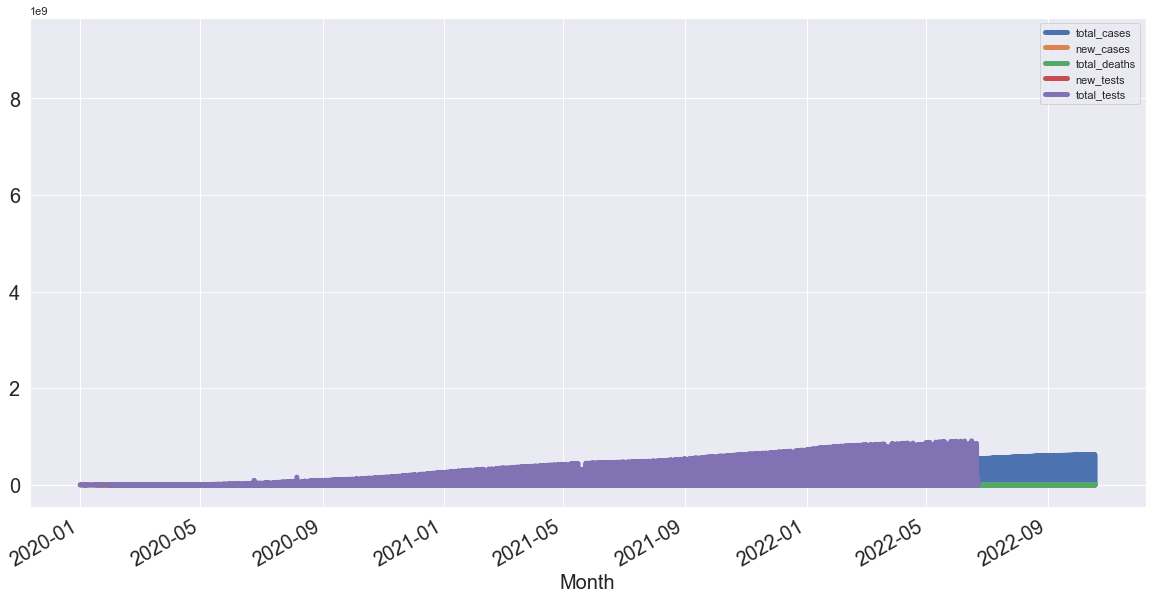

In [12]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

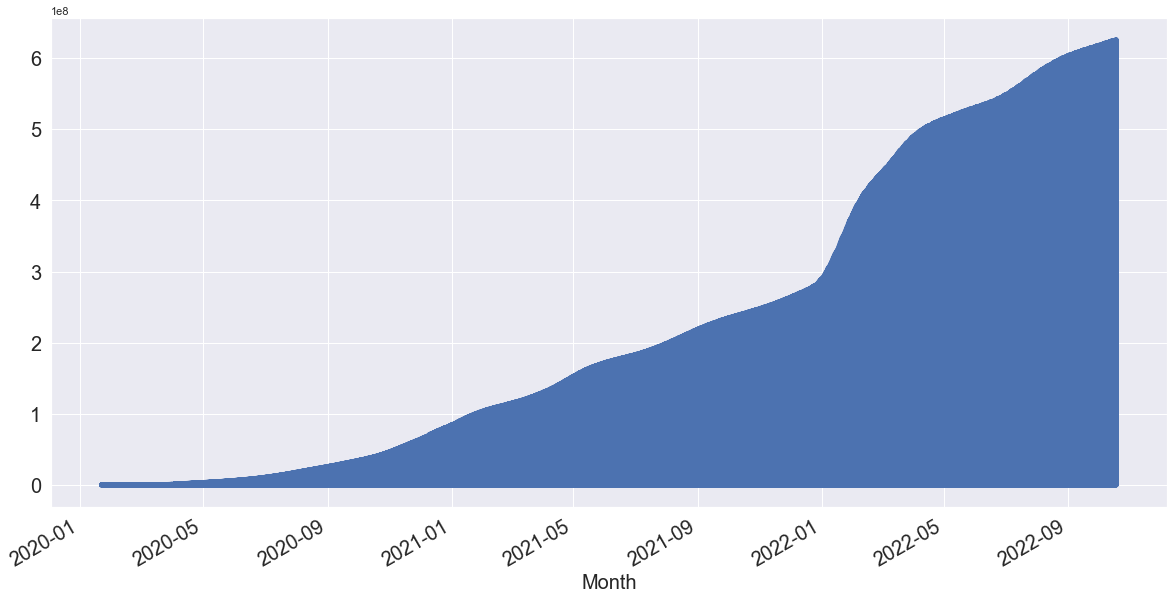

In [13]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

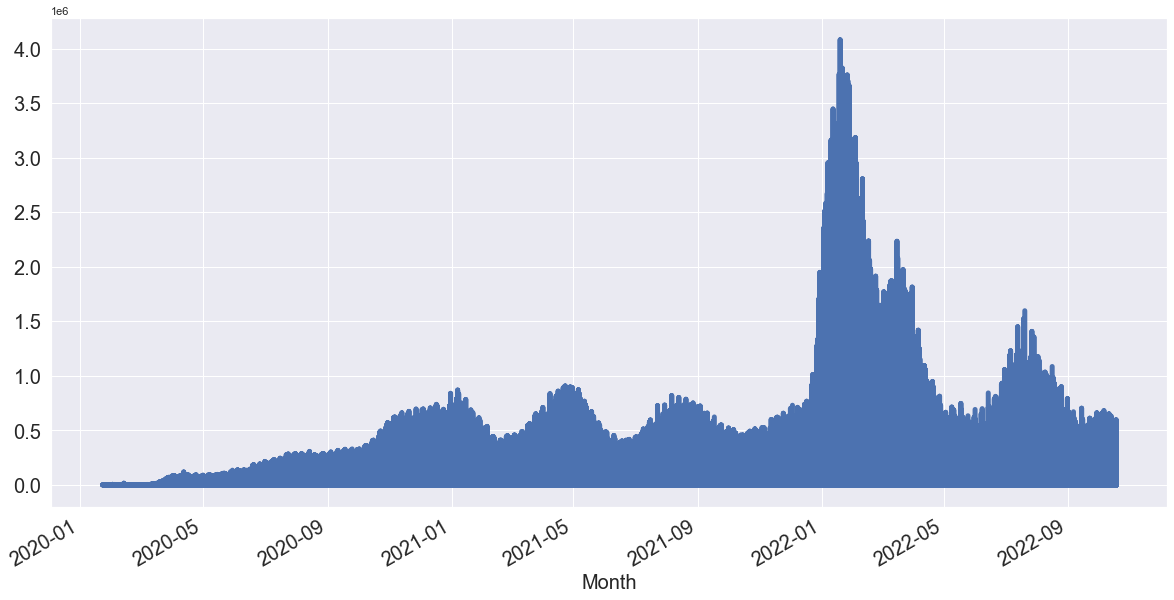

In [14]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

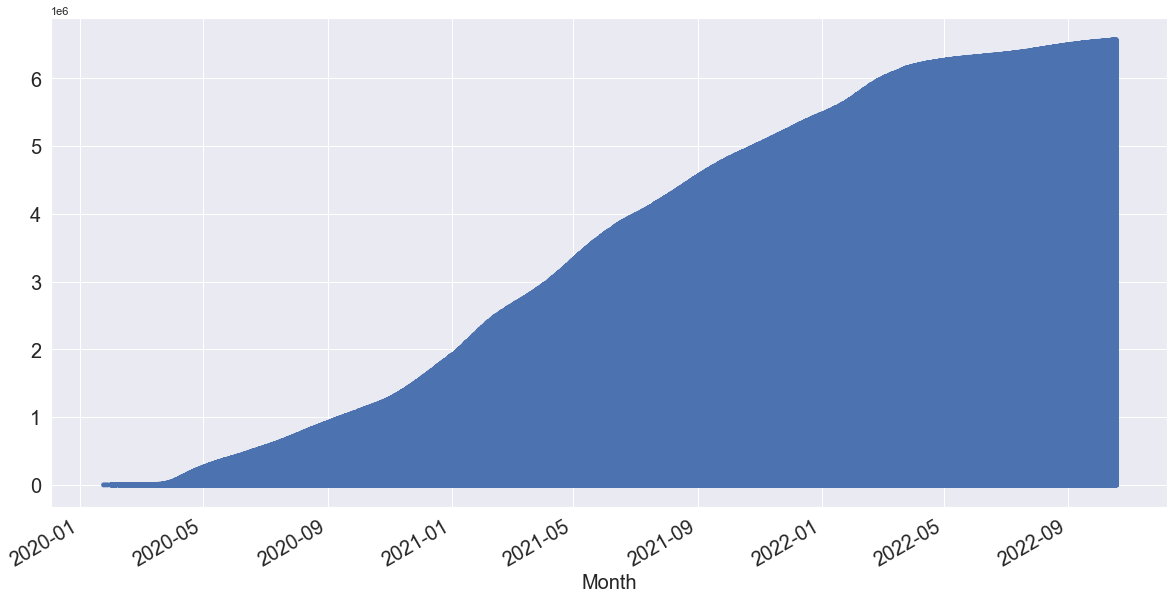

In [15]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

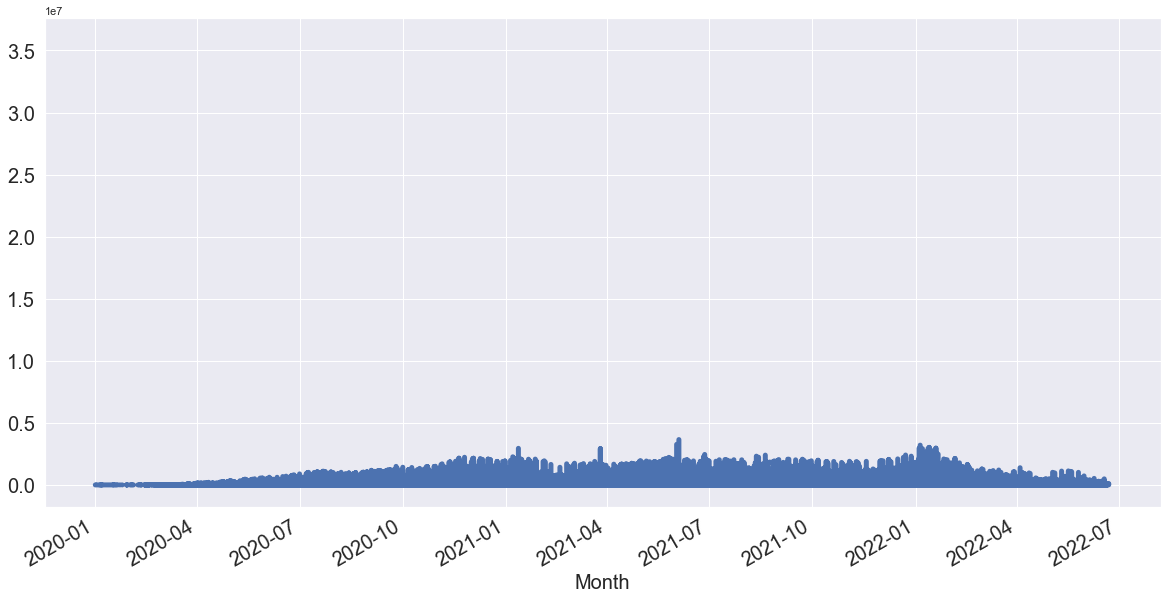

In [16]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

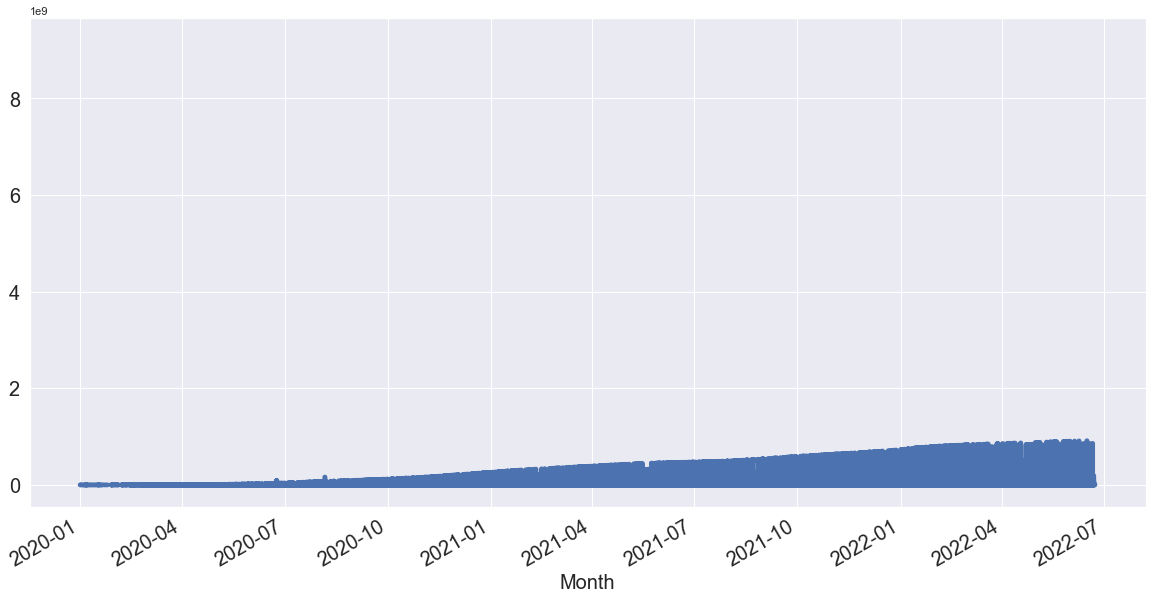

In [17]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

**Trends and Seasonality in TimeSeries Data**

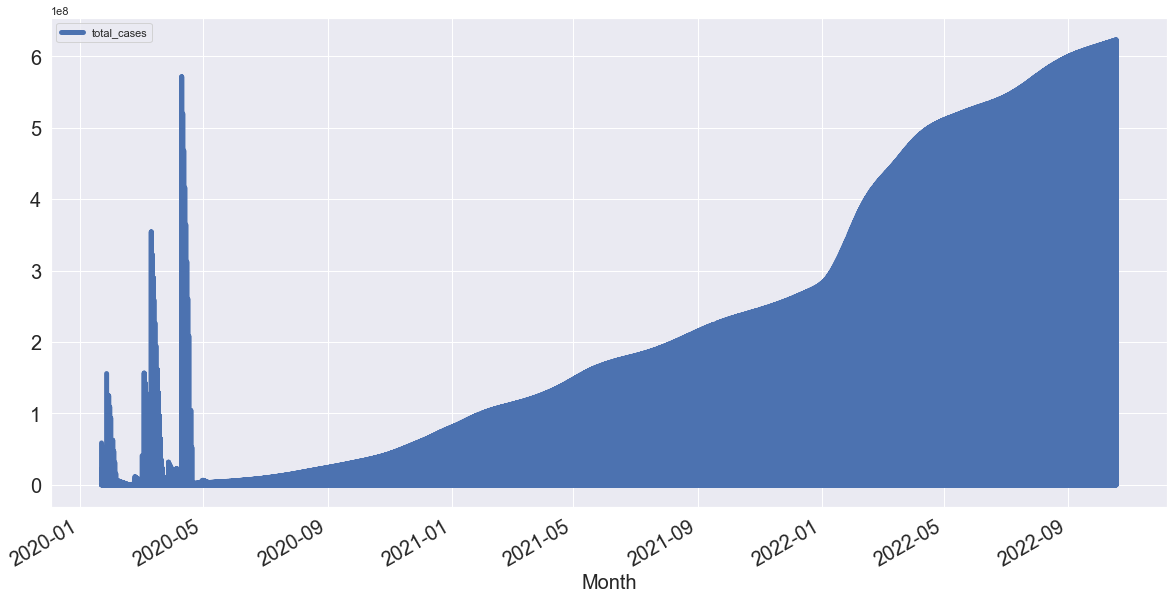

In [18]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

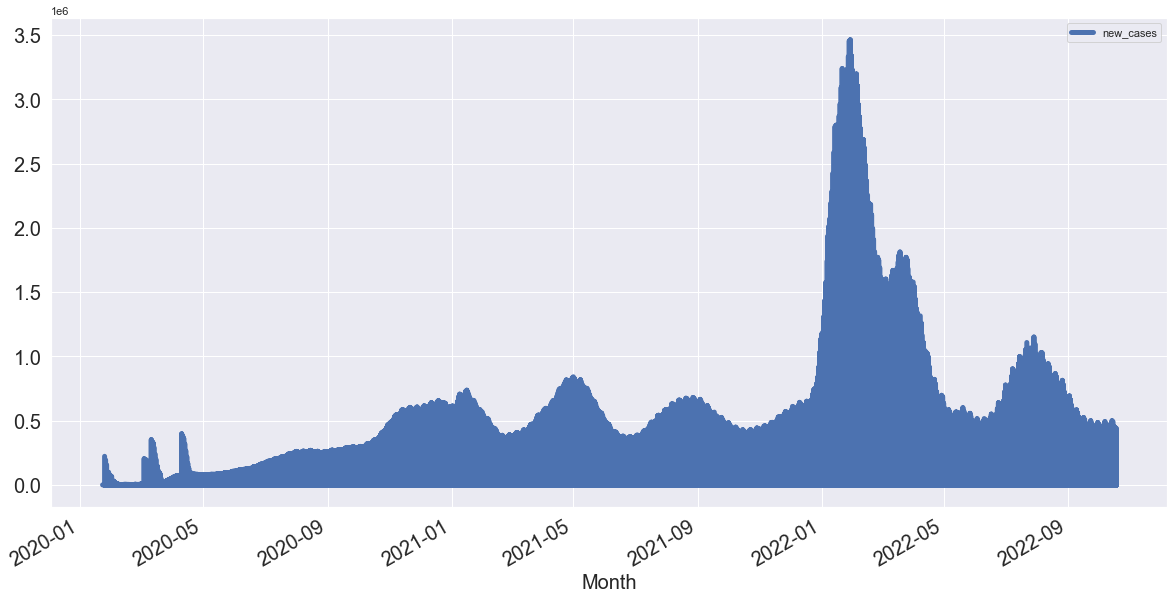

In [19]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

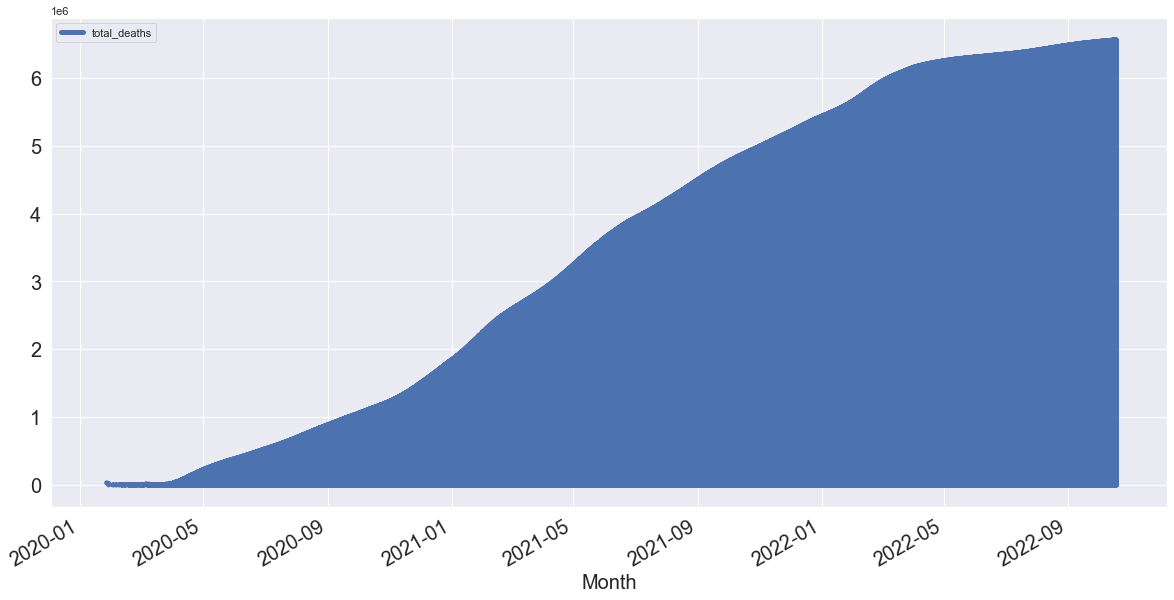

In [20]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


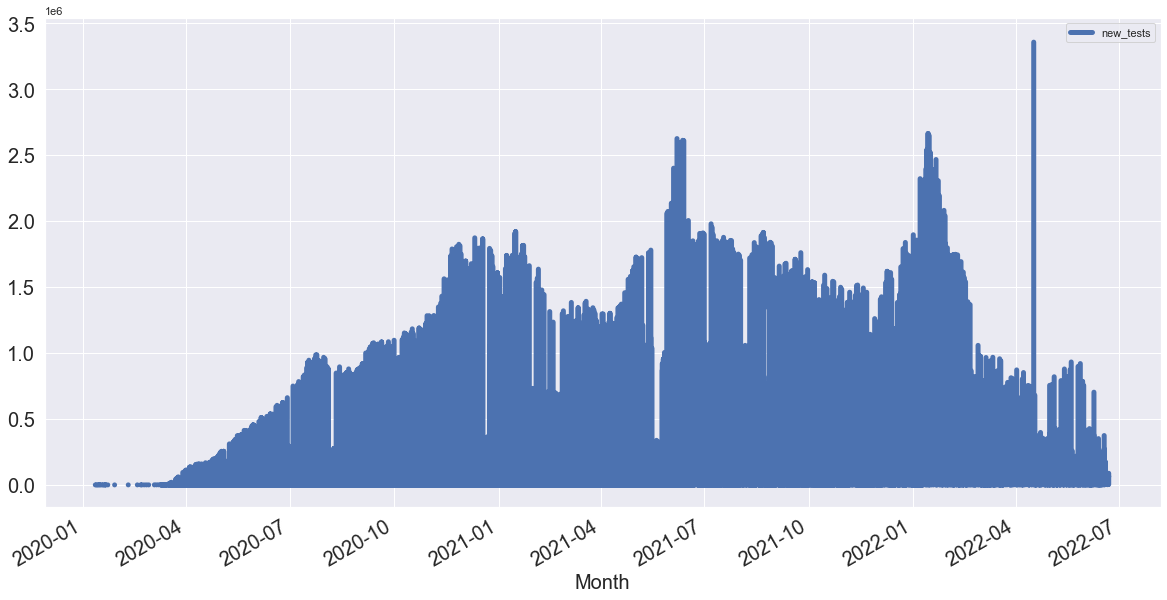

In [21]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

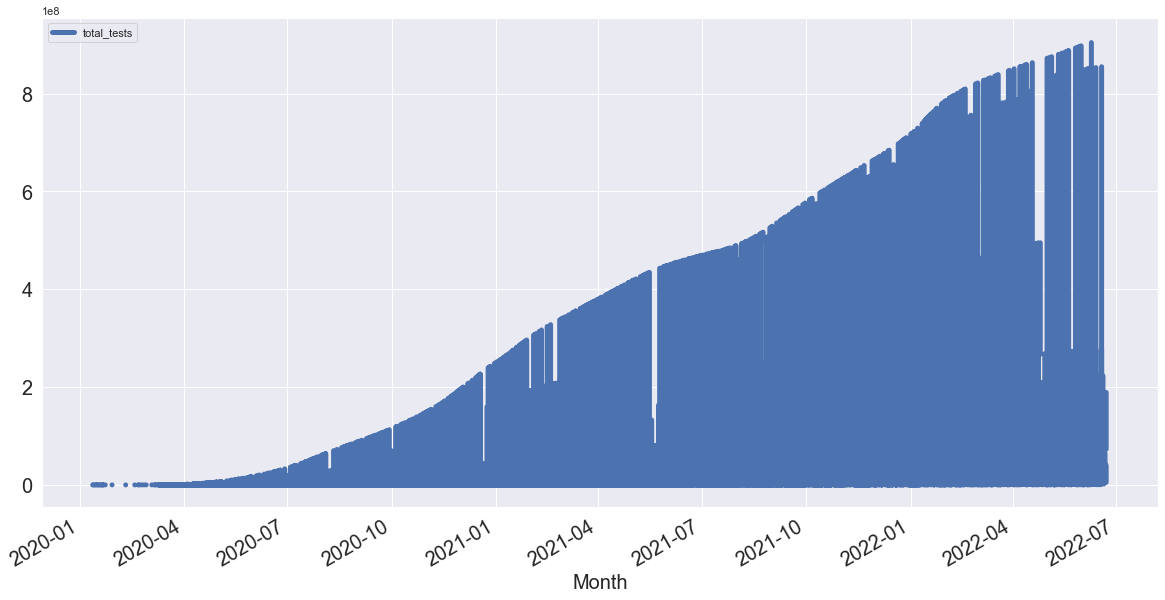

In [22]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

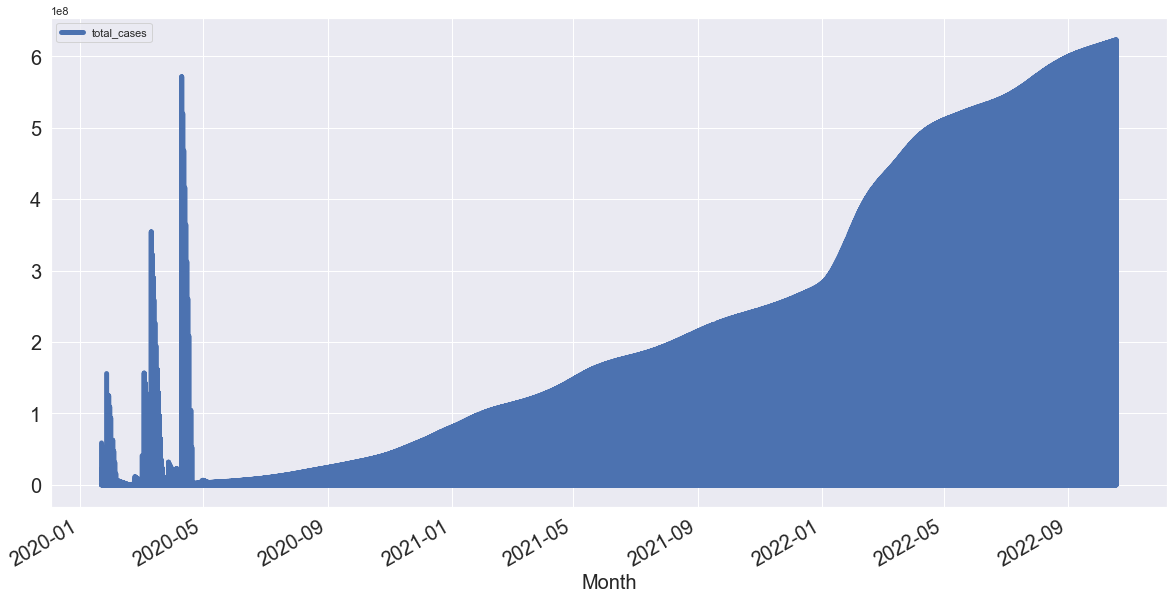

In [23]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);
